## Lab 1 for Nano 281    Anye Shi

### Q1 Initialization and data input

In this section, we are manipulating data from API materials project database. Theoretically, almost all the data in API library obtained by using DFT(density functional theory) simulation with first-principle method. Starting from atomic (or electronic) structure with minimum empirical approximation, calculation procedure precisely follows the guidance of quantum mechanics. Thus, the predicted results in API would be reliable to perform further analysis. 

Traditional perovskite materials was determined with chemical formula as ABO3 structure. Nowadays, definition of perovskites expanded to all the materials with ABX3 formula. It possesses unique properties in photovoltaic fields and catalysis area. Statistically understanding and analyzing fundamental physical properties of perovskite materials would be a promising project to rationally design and synthesize novel materials with unique properties.

Seven common chemical features was introduced to our lab (task_id, formula, number of site in unit, band gap...) using pymatgen. These data were further visualized and treated using pandas and numpy library in python.

In [2]:
from pymatgen import MPRester

ModuleNotFoundError: No module named 'pymatgen'

In [2]:
API_KEY="pOZ35cNQH0n7DWsm"

In [3]:
mpr=MPRester(API_KEY)

Connection established to Materials Project database, version 2020_09_08.


In [4]:
data=mpr.query(criteria={"elements":{"$all":["O"]},"nelements":3},properties=["task_id","pretty_formula","unit_cell_formula","band_gap","formation_energy_per_atom","icsd_ids","e_above_hull"])


In [5]:
import pandas as pd
import numpy as np

To dig out all the satisfied ABO3 structure in database, we first set 3 restrictions for their "pretty_formula":
1. Material has 3 elements (must has O element)
2. It contains 3 oxygens (O3 structure)
3. It doesn't have any other digits except 3 or () in pretty_formula (since we have ABO3 structure, only digital 3 could be shown in formula.


In [6]:
df=pd.DataFrame(data)
df=df[df['pretty_formula'].str.contains('O3')]
print (df)

          task_id pretty_formula                  unit_cell_formula  band_gap  \
0      mp-1011260         EuFeO3   {'Eu': 2.0, 'Fe': 2.0, 'O': 6.0}    0.0000   
7      mp-1080080         LaAlO3   {'La': 2.0, 'Al': 2.0, 'O': 6.0}    3.6667   
9      mp-1095489         Cu2IO3    {'Cu': 4.0, 'I': 2.0, 'O': 6.0}    0.0000   
11     mp-1096800         LaScO3   {'La': 1.0, 'Sc': 1.0, 'O': 3.0}    2.8177   
13     mp-1099583         SmTiO3   {'Sm': 1.0, 'Ti': 1.0, 'O': 3.0}    0.0000   
...           ...            ...                                ...       ...   
21659   mp-777800         Fe2O3F    {'Fe': 4.0, 'O': 6.0, 'F': 2.0}    0.0000   
21663   mp-779530       Cu(PO3)3  {'Cu': 4.0, 'P': 12.0, 'O': 36.0}    0.0000   
21673   mp-850970         Co2O3F   {'Co': 8.0, 'O': 12.0, 'F': 4.0}    0.0000   
21675   mp-976848         NiRuO3   {'Ni': 1.0, 'Ru': 1.0, 'O': 3.0}    0.0000   
21690    mvc-3464          YSnO3   {'Y': 6.0, 'Sn': 6.0, 'O': 18.0}    0.0000   

       formation_energy_per

In [7]:
df=df[df['pretty_formula'].str.contains('0|1|2|4|5|6|7|8|9|\(')==False]
print(df)

          task_id pretty_formula                 unit_cell_formula  band_gap  \
0      mp-1011260         EuFeO3  {'Eu': 2.0, 'Fe': 2.0, 'O': 6.0}    0.0000   
7      mp-1080080         LaAlO3  {'La': 2.0, 'Al': 2.0, 'O': 6.0}    3.6667   
11     mp-1096800         LaScO3  {'La': 1.0, 'Sc': 1.0, 'O': 3.0}    2.8177   
13     mp-1099583         SmTiO3  {'Sm': 1.0, 'Ti': 1.0, 'O': 3.0}    0.0000   
38     mp-1176440         MnCuO3  {'Mn': 2.0, 'Cu': 2.0, 'O': 6.0}    0.0000   
...           ...            ...                               ...       ...   
21615   mp-753428          TiVO3  {'Ti': 4.0, 'V': 4.0, 'O': 12.0}    0.0000   
21645   mp-768537        Cs3TlO3  {'Cs': 6.0, 'Tl': 2.0, 'O': 6.0}    1.7624   
21652   mp-770779          VCrO3  {'V': 4.0, 'Cr': 4.0, 'O': 12.0}    1.6264   
21675   mp-976848         NiRuO3  {'Ni': 1.0, 'Ru': 1.0, 'O': 3.0}    0.0000   
21690    mvc-3464          YSnO3  {'Y': 6.0, 'Sn': 6.0, 'O': 18.0}    0.0000   

       formation_energy_per_atom       

In [8]:
df1=df.drop_duplicates(subset=['pretty_formula'])
print(df1)

          task_id pretty_formula                  unit_cell_formula  band_gap  \
0      mp-1011260         EuFeO3   {'Eu': 2.0, 'Fe': 2.0, 'O': 6.0}    0.0000   
7      mp-1080080         LaAlO3   {'La': 2.0, 'Al': 2.0, 'O': 6.0}    3.6667   
11     mp-1096800         LaScO3   {'La': 1.0, 'Sc': 1.0, 'O': 3.0}    2.8177   
13     mp-1099583         SmTiO3   {'Sm': 1.0, 'Ti': 1.0, 'O': 3.0}    0.0000   
38     mp-1176440         MnCuO3   {'Mn': 2.0, 'Cu': 2.0, 'O': 6.0}    0.0000   
...           ...            ...                                ...       ...   
21469   mp-984756         CsMgO3   {'Cs': 1.0, 'Mg': 1.0, 'O': 3.0}    0.0000   
21524  mp-1183168          AcVO3    {'Ac': 1.0, 'V': 1.0, 'O': 3.0}    0.0000   
21528  mp-1187655         TmGeO3   {'Tm': 1.0, 'Ge': 1.0, 'O': 3.0}    0.0000   
21539  mp-1207705         TmRhO3  {'Tm': 4.0, 'Rh': 4.0, 'O': 12.0}    0.9562   
21675   mp-976848         NiRuO3   {'Ni': 1.0, 'Ru': 1.0, 'O': 3.0}    0.0000   

       formation_energy_per

#### Question 1.2 
After performing all the restriction on their pretty formula, 2548 ABO3 structures are obtained in total in API. 
We then drop all the duplicated formula, 1387 unique formula left in df1 dataframe. 
So the average polymorphs per ABO3 = 2548 / 1387 =1.837.

In [9]:
df2 = df1[df1['icsd_ids'].str.len() > 0]
print(df2)

          task_id pretty_formula                  unit_cell_formula  band_gap  \
7      mp-1080080         LaAlO3   {'La': 2.0, 'Al': 2.0, 'O': 6.0}    3.6667   
130      mp-12271         MgSeO3  {'Mg': 4.0, 'Se': 4.0, 'O': 12.0}    4.0775   
158      mp-17853          YGaO3   {'Y': 6.0, 'Ga': 6.0, 'O': 18.0}    2.9043   
166      mp-18946           VBO3     {'V': 2.0, 'B': 2.0, 'O': 6.0}    1.8733   
168      mp-19157         LaMnO3   {'La': 2.0, 'Mn': 2.0, 'O': 6.0}    0.0000   
...           ...            ...                                ...       ...   
20670    mp-20186         PrRuO3  {'Pr': 4.0, 'Ru': 4.0, 'O': 12.0}    0.0000   
20702    mp-31121         HoScO3  {'Ho': 4.0, 'Sc': 4.0, 'O': 12.0}    4.4760   
21198    mp-22364         CrPbO3   {'Cr': 1.0, 'Pb': 1.0, 'O': 3.0}    0.0000   
21231    mp-29257         LaTlO3   {'La': 2.0, 'Tl': 2.0, 'O': 6.0}    0.3504   
21237    mp-30975         Na3BO3  {'Na': 12.0, 'B': 4.0, 'O': 12.0}    2.9547   

       formation_energy_per

#### Question 1.3
In Q1.2, we know we have 1387 unique ABO3 formula. To calculate "compounds with at least one icsd_id", we only need to compute "number of unique ABO3 formula with icsd_id". We set "icsd_id" was not empty to filter all the empty list in "icsd_id" column. 
397 samples were obtained with unique ABO3 formula and icsd_id. So fraction = 397 / 1387 = 28.6%

In [10]:
df['formation_energy_j_per_mole'] = df.apply(lambda column: column.formation_energy_per_atom*96490, axis=1)
df

,task_id,pretty_formula,unit_cell_formula,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy_j_per_mole
0,mp-1011260,EuFeO3,"{'Eu': 2.0, 'Fe': 2.0, 'O': 6.0}",0.0000,-2.517135,[],0.038578,-242878.376968
7,mp-1080080,LaAlO3,"{'La': 2.0, 'Al': 2.0, 'O': 6.0}",3.6667,-3.730467,"[180416, 180418]",0.000904,-359952.718447
11,mp-1096800,LaScO3,"{'La': 1.0, 'Sc': 1.0, 'O': 3.0}",2.8177,-3.755659,[],0.204082,-362383.525018
13,mp-1099583,SmTiO3,"{'Sm': 1.0, 'Ti': 1.0, 'O': 3.0}",0.0000,-3.453389,[],0.196233,-333217.508027
38,mp-1176440,MnCuO3,"{'Mn': 2.0, 'Cu': 2.0, 'O': 6.0}",0.0000,-1.438605,[],0.035505,-138810.957842
...,...,...,...,...,...,...,...,...
21615,mp-753428,TiVO3,"{'Ti': 4.0, 'V': 4.0, 'O': 12.0}",0.0000,-2.939699,[],0.066484,-283651.597253
21645,mp-768537,Cs3TlO3,"{'Cs': 6.0, 'Tl': 2.0, 'O': 6.0}",1.7624,-1.354900,[],0.010595,-130734.256512
21652,mp-770779,VCrO3,"{'V': 4.0, 'Cr': 4.0, 'O': 12.0}",1.6264,-2.424373,[],0.030553,-233927.748430
21675,mp-976848,NiRuO3,"{'Ni': 1.0, 'Ru': 1.0, 'O': 3.0}",0.0000,0.160063,[],1.455737,15444.514692


#### Question 1.4
In this question, we are asked to do unit conversion from eV/atom to Joule/mol. "1 eV/atom = 96490 J/mol"
We create new column "formation energy joule per mol" with value equals formation energy per atom times 96490.

In [11]:
x3 = df['e_above_hull'].values
x4 = df['band_gap'].values
ranges3 = [-np.inf, 0.03, np.inf]
ranges4 = [-np.inf, 0, 1,np.inf]
df.groupby(pd.cut(x3, ranges3)).count()
df.groupby(pd.cut(x4, ranges4)).count()

df3 = pd.DataFrame( {     
"e" : x3 ,           
"bg" : x4 ,

} ) 

ranges3 = [-np.inf, 0.03, np.inf]
ranges4 = [-np.inf, 0, 1,np.inf]
c1=df3[(df3.e < 0.03) & (df3.bg <= 0)].count()
c2=df3[(df3.e > 0.03) & (df3.bg <= 0)].count()
c3=df3[(df3.e < 0.03) & (df3.bg > 0)& (df3.bg < 1)].count()
c4=df3[(df3.e > 0.03) & (df3.bg > 0)& (df3.bg < 1)].count()
c5=df3[(df3.e < 0.03) & (df3.bg >=1)].count()
c6=df3[(df3.e > 0.03) & (df3.bg >=1)].count()
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
df.groupby(pd.cut(x3, ranges3)).count()

e     162
bg    162
dtype: int64
e     988
bg    988
dtype: int64
e     93
bg    93
dtype: int64
e     238
bg    238
dtype: int64
e     563
bg    563
dtype: int64
e     504
bg    504
dtype: int64


,task_id,pretty_formula,unit_cell_formula,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy_j_per_mole
"(-inf, 0.03]",818,818,818,818,818,818,818,818
"(0.03, inf]",1730,1730,1730,1730,1730,1730,1730,1730


In [12]:
df4 = pd.DataFrame( {     
"bandgap/energy" : ['metallic','small bandgap','large bandgap'] ,           
"unstable" : [162,93,563] ,
"potentially stable" : [988,238,504]

} ) 
df4

,bandgap/energy,unstable,potentially stable
0,metallic,162,988
1,small bandgap,93,238
2,large bandgap,563,504


##### Question 1.5
This question is for "groupby/filter" question. Two indicators were selected to divide all the samples into 6 groups. (unstable/potentially stable) for formation energy and (metallic/small bandgap/large bandgap) for bandgap structure.
Results are shown above:
(metallic, unstable) = 162
(metallic, potentially stable) = 988
(small bandgap, unstable) = 93
(small bandgap, potentially stable) = 238
(large bandgap, unstable) = 563
(large bandgap, potentially stable) = 504

In [13]:
import matplotlib.pyplot as plt

-2.2424541438565995
0.8546005336517684


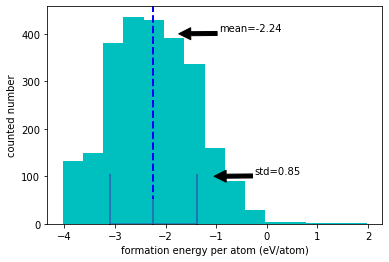

In [14]:
x1 = df['formation_energy_per_atom'].values
result = plt.hist(x1, bins=15, color='c')
plt.axvline(x1.mean(), color='b', linestyle='dashed', linewidth=2)
mean=x1.mean()
std=x1.std()
plt.annotate('mean=-2.24', xy=(mean+0.5, 400), xytext=(mean+1.3, 405),arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('std=0.85',  xy=(mean+1.2, 100), xytext=(mean+2, 105),arrowprops=dict(facecolor='black', shrink=0.001))
plt.errorbar(mean,0,xerr=std,fmt='|', ms=50,mew=2,capthick=2,capsize=50)
plt.xlabel('formation energy per atom (eV/atom)')
plt.ylabel('counted number')
print(mean)
print(std)

1.2590608712715856
1.5756767203920934


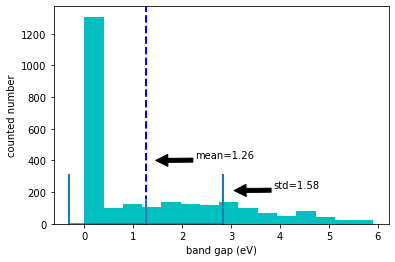

In [15]:
x2 = df['band_gap'].values
result = plt.hist(x2, bins=15, color='c')
plt.axvline(x2.mean(), color='b', linestyle='dashed', linewidth=2)
mean=x2.mean()
std=x2.std()
plt.annotate('mean=1.26', xy=(mean+0.2, 400), xytext=(mean+1, 415),arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('std=1.58',  xy=(mean+1.8, 210), xytext=(mean+2.6, 225),arrowprops=dict(facecolor='black', shrink=0.001))
plt.errorbar(mean,0,xerr=std,fmt='|', ms=50,mew=2,capthick=2,capsize=50)
plt.xlabel('band gap (eV)')
plt.ylabel('counted number')
print(mean)
print(std)

#### Question 1.6
Distribution of formation energy and bandgap structure are shown above. Mean value and standard deviation are calculated and labeled in figures. (dash line for mean and short-full line for mean+/- std)
For formation energy: 
mean=-2.24; std=0.85
For bandgap:
mean=1.26; std=1.58

### Q2 Publicly available research data
DFT calculation of ABO3 perovskites are also available in Open Quantum Materials Database (OQMD). Similarly, we are introducing this new source of data to make comparison with different data source.

In [16]:
oqmd=pd.read_csv('C:/Users/anshi/Desktop/data.csv')
oqmd

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [17]:
print(oqmd.iloc[:0])

Empty DataFrame
Columns: [Chemical formula, A, B, In literature, Valence A, Valence B, Radius A [ang], Radius B [ang], Lowest distortion, Formation energy [eV/atom], Stability [eV/atom], Magnetic moment [mu_B], Volume per atom [A^3/atom], Band gap [eV], a [ang], b [ang], c [ang], alpha [deg], beta [deg], gamma [deg], Vacancy energy [eV/O atom]]
Index: []

[0 rows x 21 columns]


In [18]:
oqmd=oqmd.drop_duplicates(subset=['Chemical formula'])
oqmd

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


#### Question 2.1&2.2&2.3
2.2: 5329 sampels are found in OQMD.
2.3: 21 columns are published in OQMD and printed in cell 19.

In [19]:
o1 = oqmd['Formation energy [eV/atom]']
print (o1.dtypes)
o1

object


0       -2.732
1       -1.957
2       -3.532
3       -2.398
4       -2.006
         ...  
5324    -1.637
5325    -2.126
5326    -3.455
5327    -1.630
5328    -2.382
Name: Formation energy [eV/atom], Length: 5329, dtype: object

In [20]:
o2=oqmd[oqmd['Formation energy [eV/atom]'].str.len() > 1]
o2

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [21]:
o2['Formation energy [eV/atom]'] = o2['Formation energy [eV/atom]'].astype(float)
o2['Formation energy [eV/atom]'] = o2['Formation energy [eV/atom]'].round(3)

C:\Users\anshi\anaconda3\envs\nano281\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anshi\anaconda3\envs\nano281\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
o3 = o2['Formation energy [eV/atom]']
print (o3.dtypes)
o3

float64


0      -2.732
1      -1.957
2      -3.532
3      -2.398
4      -2.006
        ...  
5324   -1.637
5325   -2.126
5326   -3.455
5327   -1.630
5328   -2.382
Name: Formation energy [eV/atom], Length: 5276, dtype: float64

#### Question 2.4
We first check all the data type in column "formation energy". "Object" means mixture of str&float. 
For data cleaning, we should remove all the data with only '-'. My method is to set string length bigger than 1 for formation energy. 5276 samples still left for valid sample.
Then I convert data type to float 64 with three significant decimal places (round(3)).

-1.681050227445034
0.9812546419866469


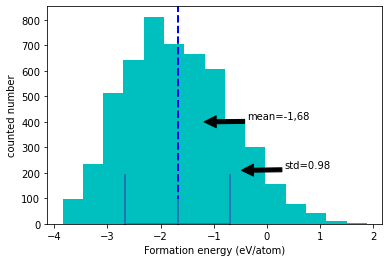

In [23]:
o4= o2['Formation energy [eV/atom]'].values
result = plt.hist(o4, bins=15, color='c')
plt.axvline(o4.mean(), color='b', linestyle='dashed', linewidth=2)
mean=o4.mean()
std=o4.std()
plt.annotate('mean=-1,68', xy=(mean+0.5, 400), xytext=(mean+1.3, 410),arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('std=0.98',  xy=(mean+1.2, 210), xytext=(mean+2, 220),arrowprops=dict(facecolor='black', shrink=0.001))
plt.errorbar(mean,0,xerr=std,fmt='|', ms=50,mew=2,capthick=2,capsize=50)
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('counted number')
print(mean)
print(std)

#### Question 2.5
Distribution histgram is shown above for formation energy per atom with mean -1.68 and std 0.98.

### Question 3-Comparing data set

In [24]:
n1 = o2['Chemical formula'].values
o4= o2['Formation energy [eV/atom]'].values
n0=df['pretty_formula'].values
x1 = df['formation_energy_per_atom'].values

In [25]:
c1 = pd.DataFrame( {     
"formula" : n1 ,           
"energy" : o4 ,

} ) 
c1

,formula,energy
0,Ac2O3,-2.732
1,AcAgO3,-1.957
2,AcAlO3,-3.532
3,AcAsO3,-2.398
4,AcAuO3,-2.006
...,...,...
5271,ZrWO3,-1.637
5272,ZrYO3,-2.126
5273,ZrYbO3,-3.455
5274,ZrZnO3,-1.630


Formation energy per atom from OQMD database

In [26]:
c2 = pd.DataFrame( {     
"formula" : n0 ,           
"energy" : x1 ,

} ) 
c2

,formula,energy
0,EuFeO3,-2.517135
1,LaAlO3,-3.730467
2,LaScO3,-3.755659
3,SmTiO3,-3.453389
4,MnCuO3,-1.438605
...,...,...
2543,TiVO3,-2.939699
2544,Cs3TlO3,-1.354900
2545,VCrO3,-2.424373
2546,NiRuO3,0.160063


Formation energy per atom from API database

In [27]:
c3 = pd.merge(c1, c2, on='formula') # merge them
c3

,formula,energy_x,energy_y
0,AcAlO3,-3.532,-3.699194
1,AcBO3,-2.316,-2.484567
2,AcCrO3,-3.138,-3.150949
3,AcCuO3,-2.241,-2.432070
4,AcFeO3,-2.731,-2.876250
...,...,...,...
2109,ZrPbO3,-2.142,-2.859502
2110,ZrSiO3,-2.058,-2.229530
2111,ZrTiO3,-2.535,-2.738690
2112,ZrTlO3,-2.139,-2.464713


#### Question 3.1
To make my results much more clear, I create two dataframe with formula and formation energy obtained from API and OQMD dataset. (c1 amd c2, respectively) Then I merge two data frame based on formula. 2114 samples exist for both two dataset with different data source.


-2.0637852412488176
0.8873832958565029
-2.354024604405064
0.8424437708409365


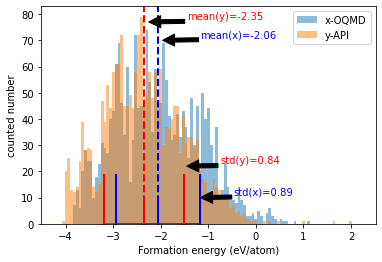

In [28]:
x = c3['energy_x'].values
y = c3['energy_y'].values

bins = np.linspace(-4.2, 2.2, 110)
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=2)
meanx=x.mean()
stdx=x.std()
plt.annotate('mean(x)=-2.06', color='b',xy=(meanx+0.1, 70), xytext=(meanx+0.9, 71),arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('std(x)=0.89', color='b', xy=(meanx+0.9, 10), xytext=(meanx+1.6, 11),arrowprops=dict(facecolor='black', shrink=0.001))
plt.errorbar(meanx,0,xerr=stdx,fmt='|', color='b',ms=50,mew=2,capthick=2,capsize=50)
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('counted number')
print(meanx)
print(stdx)
plt.axvline(y.mean(), color='r', linestyle='dashed', linewidth=2)
meany=y.mean()
stdy=y.std()
plt.annotate('mean(y)=-2.35', color='r',xy=(meany+0.1, 77), xytext=(meany+0.9, 78),arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('std(y)=0.84', color='r', xy=(meany+0.9, 22), xytext=(meany+1.6, 23),arrowprops=dict(facecolor='black', shrink=0.001))
plt.errorbar(meany,0,xerr=stdy,fmt='|', color='r',ms=50,mew=2,capthick=2,capsize=50)
print(meany)
print(stdy)

plt.hist(x, bins, alpha=0.5, label='x-OQMD')
plt.hist(y, bins, alpha=0.5, label='y-API')
plt.legend(loc='upper right')
plt.show()

#### Question 3.2
Hist plot of OQMD and API formation energy results are shown above. All blue-like labels are for OQMD (Hist, mean, std). Orange-red like labels are for data from API Materials Project.
For OQMD data: mean= -2.06; std= 0.89
For API data: mean= -2.35; std= 0.84

In [29]:
from scipy import stats

In [30]:
stats.ttest_ind(x, y)

Ttest_indResult(statistic=10.903649014157986, pvalue=2.551090051298267e-27)

#### Question 3.3
Since we have two set of "energy formation data" for same "chemical formula", these two set of data are not independent. So we need to perform "paired t-test" to determine if these two sets of data have certain relations.

Scipy.stats were introduced to calculate p-value. Due to unequal variance, we select ttest.ind as right parameters. P-value was calculated to be 2.55e-27, a really small value <<0.05, indicating we have strong reasons to reject null hypothesize. So we could state in confident that there is a significant difference between OQMD and API database for energy formation data.


Possible explanation for discrepancy:
As shown in figure displayed in Q3.2, we saw a relative huge gap of mean~0.3eV. But the distribution shape and std value looks similar. Based on this observation results, I have several ideas:
1. We know API and OQMD all came from DFT simulation[1,2]. More specifically, they all use VASP-package -projector-augmented wave method - GGA-PBE approximation. So they have really similar computing basis set. That's why they obtained two distribution with similar shape (similar architecture for algorithm.)
2. However, numerical discrepancy might come from different correction/approximation term and crystal structure. Several correction terms are widely applied to VASP simulation, such as DFT-D3; DFT-U; DFT-b3lyp. Different correction term with different level of precision will definitely change the final results. Also, for crystal structure construction, different crystal size and symmetric structure will influnce density of state and electronic structure. For example, model A with 2*1*1 size and model B with 3*1*1 size. Model A & B will obtain different charge distribution due to quantum confinement effect.
3. DFT first principle approximation has systematic error in formation energies due to enlarged bond-length in computation model. (~1-2% larger than real condition.)

References:
[1] Ong, Shyue Ping, et al. "The Materials Application Programming Interface (API): A simple, flexible and efficient API for materials data based on REpresentational State Transfer (REST) principles." Computational Materials Science 97 (2015): 209-215.
[2] Emery, Antoine A., and Chris Wolverton. "High-throughput dft calculations of formation energy, stability and oxygen vacancy formation energy of abo 3 perovskites." Scientific data 4 (2017): 170153.